# 5.14 자연어분석 전처리
### 형태소 분석 - 문장을 형태소로 품사부착!
### 구문 분석 - 주어 목적어 서술어와 같은 구문단위를 찾음
### 의미분석 - 문장이 의미적으로 올바른 문장인지를 판단
### 담론분석 - 대화 흐름상 어떤 의미를 가지는지를 찾음
### 일단 형태소 분석 - 영어는 stemming 우리나라는 형태소 분석

# KONLPY 설치 : JDK 설치 - JPype 설치 - KoNlPy설치
### 설치 후 테스트

In [1]:
from konlpy.tag import Kkma

Kkma().pos("아버지가 방에 들어가신다.")

### corpus 보기

In [6]:
from konlpy.corpus import kolaw, kobill
kolaw.fileids()
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [15]:
corpus = kolaw.open(kolaw.fileids()[0]).read()
print('어절 개수 :',len(corpus.split())) # 100만어절 정도부터 시작 1000만어절 1억절이 되야 실험할정도가 됨
print('줄 개수 :', len(corpus.splitlines())) # 몇 라인인지 보는거 

어절 개수 : 4178
줄 개수 : 356


### 문단 -> 문장(split) => tokenize -> 어절(word) tokenize
### -+=!@#$%^; ',' => 구두점 -> puctuation

In [22]:
from nltk.corpus import brown,  # 기본서 brown
len(brown.fileids()) # tagged corpus 품사 부착된 말뭉치
corpus = brown.open(brown.fileids()[0]).read()

In [23]:
len(corpus.split()), len(corpus.splitlines())

(2242, 238)

In [26]:
corpus.split()[:2]

['The/at', 'Fulton/np-tl']

### nltk 다운로드

In [33]:
import nltk
nltk.download("brown")
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer #문장, 딘아, 트윗터토크나이저(감정 표현에 많이 쓰임)

sentences = sent_tokenize(corpus)
tokens = terms = word_tokenize(sentences[0])
len(tokens), len(sentences[0].split()) # 서로 다름 우리는 언어학에 기초한 라이브러리들을 사용해야함

(31, 25)

In [40]:
tokens

['The/at',
 'Fulton/np-tl',
 'County/nn-tl',
 'Grand/jj-tl',
 'Jury/nn-tl',
 'said/vbd',
 'Friday/nr',
 'an/at',
 'investigation/nn',
 'of/in',
 "Atlanta's/np",
 '$',
 'recent/jj',
 'primary/nn',
 'election/nn',
 'produced/vbd',
 '``',
 '/',
 '``',
 'no/at',
 'evidence/nn',
 '``',
 '/',
 "''",
 'that/cs',
 'any/dti',
 'irregularities/nns',
 'took/vbd',
 'place/nn',
 './',
 '.']

In [159]:
corpus = """
경기지역 버스 노조가 15일 파업을 예고한 가운데, 경기도가 일반 시내버스와 직행좌석버스의 요금을 각각 200원, 400원 인상하기로 전격 결정했다. 주 52시간제 시행에 따른 인력충원과 임금 보전 문제 등을 놓고 협상을 벌여온 버스 노동자와 버스 업체 간 합의 가능성이 커진 셈이다.
 
이재명 경기도지사는 14일 오후 서울 여의도 더불어민주당사에서 이해찬 민주당 대표, 김현미 국토교통부 장관과 만난 뒤, 이같이 합의했다고 밝혔다.
 
이재명 지사는 브리핑에서 "경기도 버스 요금을 인상할 수밖에 없다"며 "지금 상태로 계속 갈 경우 결국 대규모 감차 운행이나 배차 축소로 인한 도민들의 교통 불편이 극심하게 될 가능성이 크고, 사회적으로 여러 가지 심각한 문제들이 예상되기 때문"이라고 설명했다.
 
이 지사는 이어 "버스 파업을 앞두고 있고, 주 52시간제 정착이나 근로시간 단축, 운행조건 개선을 통한 도민의 안전확보가 시급한 과제인데, 해결 방법이 참으로 마땅치 않다"며 안타까워했다.

9월부터 인상 적용... 정부, 광역버스 업무 국가사무로 이관
 
구체적인 내용을 보면, 경기도는 오는 9월께부터 일반 시내버스 요금을 현행 1250원에서 1450원으로, 직행좌석버스 요금을 2400원에서 2800원으로 각각 인상키로 했다. 버스요금을 인상하라고 꾸준히 압박해 온 정부의 요구를 사실상 경기도가 수용한 것이다. 

대신, 정부는 광역버스 업무를 국가사무로 이관해야 한다는 경기도의 요구를 받아들였다. 정부는 또 버스 공영차고지, 격지 노선 등을 정부의 국고 보조금 지원 대상으로 전환, 지방자치단체의 부담을 덜어주기로 했다. 
"""

### nltk는 영어 기준이라 한글이 어떻게 짤리는지 봐야함
### 식량을 => 구두점 + 식량 + 어미면 식량이 중요한 부분이다를 판단해야함

In [160]:
setences = sent_tokenize(corpus)
len(sentences), len(corpus.splitlines())
len(word_tokenize(corpus)), len(corpus.split())

(216, 183)

In [161]:
from nltk.tokenize import regexp_tokenize

In [162]:
# Bag of words / one-hot encoding -> sparse representation -> vector
# 모두가 독립이기 때문에 모두다 feature이다
sent_tokenize("오늘은. 화요일입니다.! :) ;( ㅠㅠ") # 문장

['오늘은.', '화요일입니다.!', ':) ;( ㅠㅠ']

In [163]:
word_tokenize("오늘은. 화요일입니다.! :) ;( ㅠㅠ", preserve_line=False) # 어절

['오늘은', '.', '화요일입니다.', '!', ':', ')', ';', '(', 'ㅠㅠ']

In [164]:
TweetTokenizer().tokenize("오늘은. 화요일입니다.! :) ;( ㅠㅠ") # 트윗어절

['오늘은', '.', '화요일입니다', '.', '!', ':)', ';(', 'ㅠㅠ']

In [165]:
regexp_tokenize("오늘은. ^^화요일입니다.! :) ;( ㅠㅠ", r"\^\^|ㅠㅠ") # 정규식표현으로 써준친구만 추출함

['^^', 'ㅠㅠ']

In [166]:
from nltk.corpus import gutenberg
corpus = gutenberg.open(gutenberg.fileids()[0]).read()

In [167]:
sentences = sent_tokenize(corpus)
sentences[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

### 정규식 표현으로 tokenize 하기

In [168]:
# [12345] => 저중에 1개
# 영어 소문자와 대문자로만 이루어진 토큰을 뽑겠다
pattern = r"([A-Za-z]+)"
# pattern = r"([A-Za-z]{2})"
# 한글
# pattern = r"([ㄱ-ㅎㅏ-ㅣ가-힣]+)"
regexp_tokenize(sentences[1], pattern)

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period']

# 지프의 법칙
## 어떤 문서에서 어떤 단어가 많이 나오면 그 단어는 중요하지 않다! - 반비례 관계 => 불용어 처리 해야함
## 단어:빈도 -> 순위

In [169]:
from nltk import Text
# from nltk.collections

textObj = Text(word_tokenize(corpus))

In [170]:
len(textObj), len(set(textObj)), textObj.vocab()

(191785,
 8406,
 FreqDist({',': 12016, '.': 6355, 'to': 5125, 'the': 4844, 'and': 4653, 'of': 4272, 'I': 3177, '--': 3100, 'a': 3001, "''": 2452, ...}))

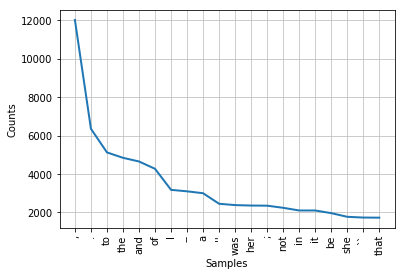

In [171]:
textObj.plot(20)

In [172]:
from konlpy.corpus import kolaw
corpus = kolaw.open(kolaw.fileids()[0]).read()

### matplotlib 한글설정

In [181]:
from matplotlib import rc, font_manager
path = "c:/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font)

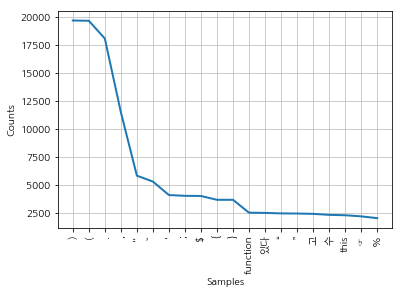

In [182]:
textObj = Text(word_tokenize(corpus))
textObj.plot(20)

# 저장한 뉴스기사로 파일읽기

In [200]:
import os

base = "./news_crawl_project/"
for _ in os.listdir(base):
    with open(base + _, encoding='utf-8') as fp:
        corpus += fp.read()
        

In [201]:
len(corpus.split())

604979

In [202]:
textObj = Text(word_tokenize(corpus))

In [203]:
len(textObj), len(set(textObj)), textObj.vocab()

(782947,
 105194,
 FreqDist({'.': 24111, ',': 23441, ')': 19837, '(': 19813, "''": 8295, '``': 7048, ';': 6392, 'to': 5130, 'the': 4863, 'and': 4668, ...}))

In [204]:
textObj.vocab().most_common(10)

[('.', 24111),
 (',', 23441),
 (')', 19837),
 ('(', 19813),
 ("''", 8295),
 ('``', 7048),
 (';', 6392),
 ('to', 5130),
 ('the', 4863),
 ('and', 4668)]

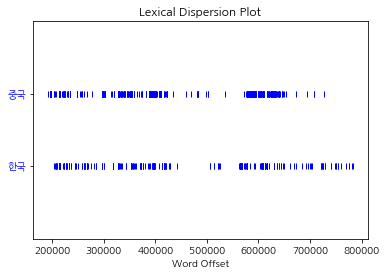

iframe resize; var frmTarget; nate news; function setYoutube; flash
오류를; 오류를 우회하기; Mr. Knightley; Mrs. Weston; function
_flash_removeCallback; Mr. Elton; Frank Churchill; Miss Woodhouse; 도널드
트럼프; 것으로 보인다; 것으로 알려졌다; Mr. Weston; Mrs. Elton; Miss Bates; Miss
Fairfax; Jane Fairfax


In [211]:
# textObj.count('중국')
# textObj.concordance('중국')
textObj.dispersion_plot(["중국", "한국"])
textObj.collocations() # 자주나오는 패턴들

In [192]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
textObj = Text(word_tokenize(corpus))


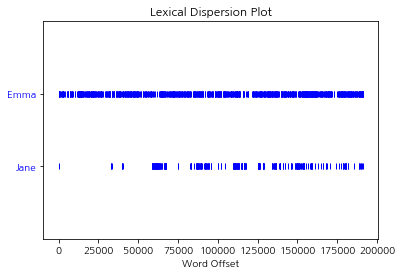

she it he i weston you her harriet elton him me knightley jane that
and the all there they them

Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; Miss
Woodhouse; Miss Bates; Mrs. Elton; Miss Fairfax; Mr. Weston; Jane
Fairfax; every thing; Mr. Woodhouse; every body; young man; great
deal; dare say; Maple Grove; Mrs. Goddard; John Knightley; Miss Smith


In [199]:
# textObj.count('Emma')
textObj.dispersion_plot(['Emma', 'Jane'])
textObj.similar("Emma")
print("")
textObj.collocations()

In [206]:
corpus = kolaw.open(kolaw.fileids()[0]).read()
kolaw = Text(word_tokenize(corpus))

In [210]:
kolaw.collocations()
# kolaw.similar("국민")

법률이 정하는; 법률로 정한다; 사항은 법률로; 권리를 가진다; 의하지 아니하고는; 필요한 사항은; 경우를 제외하고는;
대통령이 임명한다; 규칙을 제정할; 찬성이 있어야; 자유를 가진다; 자문에 응하기; 국회의 동의를; 저촉되지 아니하는; 헌법에
의하여; 대통령의 자문에; 법률에 저촉되지; 임기는 6년으로; 아니하는 범위안에서; 국회재적의원 3분의
